<a href="https://colab.research.google.com/github/Rajendarkatravath/Dog_cat_classification/blob/main/dog_cat_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
!ls


drive  sample_data


In [3]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 231MB/s]
100% 1.06G/1.06G [00:04<00:00, 230MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
conv_base.trainable = False

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 189s 290ms/step - loss: 0.3208 - accuracy: 0.8631 - val_loss: 0.2495 - val_accuracy: 0.8948
Epoch 2/10
625/625 [==============================] - 187s 299ms/step - loss: 0.2376 - accuracy: 0.8978 - val_loss: 0.1810 - val_accuracy: 0.9258
Epoch 3/10
625/625 [==============================] - 186s 297ms/step - loss: 0.2230 - accuracy: 0.9053 - val_loss: 0.1770 - val_accuracy: 0.9258
Epoch 4/10
625/625 [==============================] - 186s 297ms/step - loss: 0.2129 - accuracy: 0.9087 - val_loss: 0.1579 - val_accuracy: 0.9336
Epoch 5/10
625/625 [==============================] - 185s 296ms/step - loss: 0.1991 - accuracy: 0.9154 - val_loss: 0.1825 - val_accuracy: 0.9218
Epoch 6/10
625/625 [==============================] - 185s 296ms/step - loss: 0.1946 - accuracy: 0.9168 - val_loss: 0.1485 - val_accuracy: 0.9374
Epoch 7/10
625/625 [==============================] - 222s 355ms/step - loss: 0.1845 - accuracy: 0.9212 - val_loss: 0.1517 -

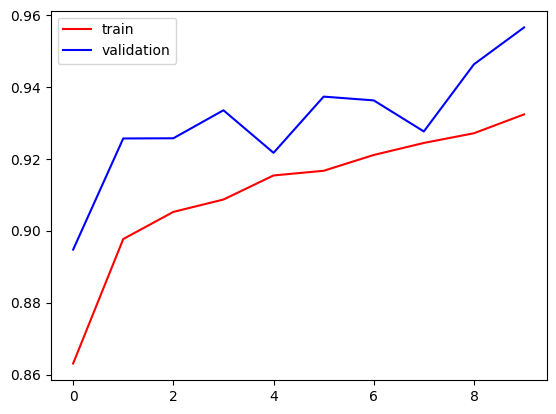

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

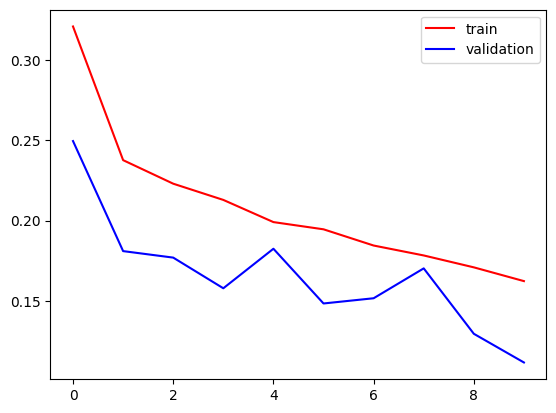

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()